# Moein Shirdel - 810197535
# AI - CA5 - Phase 2


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/xray.zip" .

^C


In [2]:
!unzip /content/drive/MyDrive/xray.zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [5]:
from tensorflow.keras import *
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import matplotlib.pyplot as mtplot

## 1- Loading datasets:
In this part, the datasets are loaded using data generators which have given us some information about out input data (both train and test)

** The number of input data is printed above. We have 5144 input images for training data and 1288 images for test data. Besides, it says that these images belong to 3 different classes.

In [6]:
data_generator = preprocessing.image.ImageDataGenerator()

In [7]:
train_data = data_generator.flow_from_directory(
    "/content/Data/train",
    target_size=(80, 80),
    color_mode="grayscale",
    batch_size=32
)

Found 5144 images belonging to 3 classes.


In [8]:
test_data = data_generator.flow_from_directory(
    "/content/Data/test",
    target_size=(80, 80),
    color_mode="grayscale",
    batch_size=32
)

Found 1288 images belonging to 3 classes.


In [9]:
def load_data(scale_rate, BATCH_SIZE=32):
  dataLoader = preprocessing.image.ImageDataGenerator(rescale=scale_rate)
  train_data = dataLoader.flow_from_directory("/content/Data/train",
                                             target_size = (80,80),
                                             color_mode = "grayscale",
                                             batch_size = BATCH_SIZE)
  test_data = dataLoader.flow_from_directory("/content/Data/test",
                                             target_size = (80,80),
                                             color_mode = "grayscale",
                                             batch_size = BATCH_SIZE)
  return train_data, test_data

def get_expected_labels(dataset):
  labels_list = []
  for i in range(len(dataset)):
    data, labels = dataset.next()
    for label in labels:
      labels_list.append(backend.argmax(label))

  return np.array(labels_list)

# LPE: Loss Per Epoch
def draw_LPE_plot(fit_history):
  print(fit_history.keys())
  mtplot.plot(fit_history['loss'])
  mtplot.plot(fit_history['val_loss'])
  mtplot.title('Loss rate per epoch')
  mtplot.ylabel('Loss')
  mtplot.xlabel('Epoch')
  mtplot.legend(['train', 'test'])
  mtplot.show()

## 2- Classes Information:
In this part, first a candidate image of each class is shown and then a bar plot of each class's frequency is drawn which shows that PNEUMONIA is the most common class in the input data.

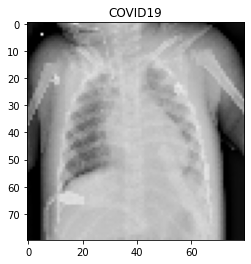

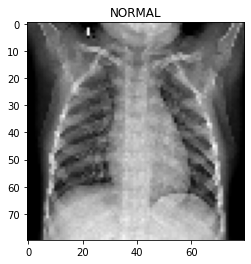

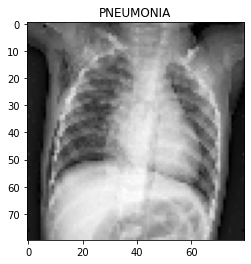

In [20]:
index = 0
for label in (train_data.class_indices):
  img = preprocessing.image.img_to_array(train_data[index][0][0])
  index += 1
  mtplot.imshow(img.reshape(80,80), cmap='gray')
  mtplot.title(label)
  mtplot.show()

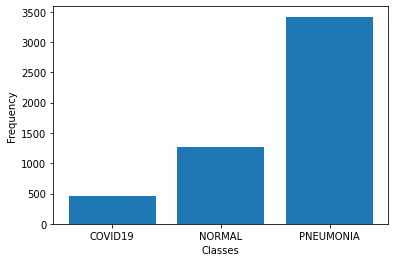

In [21]:
CLASSES_NUM = 3
frequencies = []
tick_labels = ['COVID19', 'NORMAL', 'PNEUMONIA']
for i in range(CLASSES_NUM):
  frequencies.append(np.sum(train_data.classes == i))

x_axis = [i for i in range(CLASSES_NUM)]
mtplot.bar(x_axis, frequencies, tick_label=tick_labels)
mtplot.xlabel("Classes")
mtplot.ylabel("Frequency")
mtplot.show()

## 3- Neural Network basic structure:
In this part, the basic neural network which has 2 hidden layers is designed. These layers use "relu" as activation function and some other parameters given in the question. The results will be discussed in the next part.


In [23]:
def design_network():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

## 4- Training with different activation functions:
I) The network designed in the previous part is trained(using relu activation function for the hidden layers). The model summary is printed below, then the classification report is printed. The network hasn't performed well since we haven't normalized the input data and this has caused overflow in the very first steps and the loss value shown Nan. Thus the accuracy and performance metrics do not show acceptable values.


Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_21 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_22 (Dense)             (None, 3)                 3075      
Total params: 15,210,499
Trainable params: 15,210,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
161/161 [=========

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


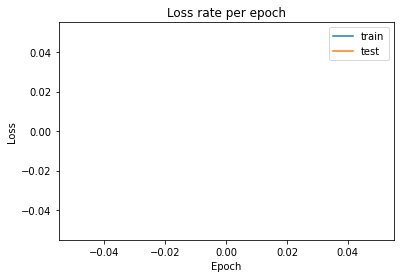

In [24]:
train_data, test_data = load_data(scale_rate=None, BATCH_SIZE=32)
network_model = design_network()
fit_result = network_model.fit(train_data, epochs=10, validation_data=test_data)

train_data, test_data = load_data(scale_rate=None, BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

II) Now the activation functions are changed to "tanh". Since this function scales the output of the layers to [-1, 1], the network does not suffer from overflow and extremely big values and the performance improves.

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 3075      
Total params: 15,210,499
Trainable params: 15,210,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
161/161 [=========

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


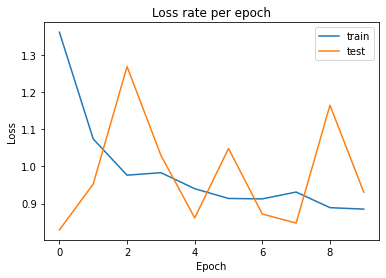

In [25]:
def design_network_model_tanh():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="tanh")(out_layer)
  out_layer = layers.Dense(1024, activation="tanh")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=None, BATCH_SIZE=32)
network_model = design_network_model_tanh()
fit_result = network_model.fit(train_data, epochs=10, validation_data=test_data)

train_data, test_data = load_data(scale_rate=None, BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

III) Using tanh as activation function has given better results and accuracy, but it's not good enough. As we can see in the warning above, some metrics have 0 value which we saw this in the previous part when using relu as activation function. In both cases, normalizing the data will solve the problem, as we can see in the next parts.

## 5- Normalizing input data and finding the optimize model:
The data is normalized by dividing all the input values to 255, in order to scale them between 0 and 1. This, gives us better results since the values are small and they don't cause overflow in weights. In order to optimize the model, an extra layer withj 256 neurons is added. Other parameters haven't been changed. Usinf this model, the results have improved and an accuracy above 90% is reached.

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_24 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_25 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_26 (Dense)             (None, 3)                 771       
Total params: 15,470,595
Trainable params

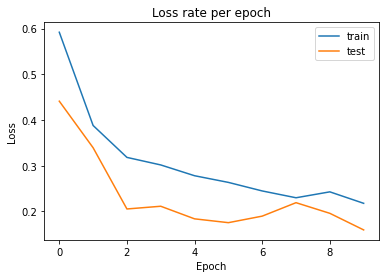

In [ ]:

def design_optimize_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(256, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_optimize_network_model()
fit_result = network_model.fit(train_data, epochs=10, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)


## 6- Optimizers:
I) Momentum: To avoid the situation of getting stucked in a local minima while predicting a test data, we use a momentum term in the objective function, which is a value between 0 and 1 that increases the size of the steps taken towards the minimum by trying to jump from a local minima. 

If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step. A small value of momentum cannot reliably avoid local minima, and can also slow down the training of the system. Momentum also helps in smoothing out the variations, if the gradient keeps changing direction. A right value of momentum can be either learned by hit and trial or through cross-validation.

II) The results using momentum value of 0.5 and 0.9 were good, but momemtum=0.99 caused some problems.

A- Network with momentum=0.5:

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_27 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_28 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_29 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_30 (Dense)             (None, 3)                 771       
Total params: 15,470,595
Trainable params

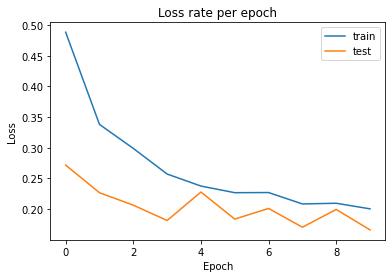

In [ ]:

def design_optimize_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(256, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_optimize_network_model()
fit_result = network_model.fit(train_data, epochs=10, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

B- Network with momentum=0.9:

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_43 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_44 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_45 (Dense)             (None, 3)                 771       
Total params: 15,470,595
Trainable param

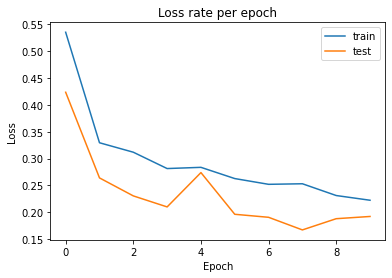

In [ ]:
def design_optimize_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(256, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_optimize_network_model()
fit_result = network_model.fit(train_data, epochs=10, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

C- Network with momentum=0.99:

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_48 (Dense)             (None, 3)                 3075      
Total params: 15,210,499
Trainable params: 15,210,499
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
161/161 [========

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


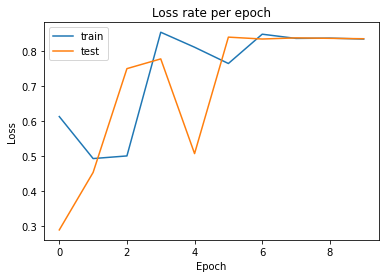

In [ ]:
def design_optimize_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.99), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_optimize_network_model()
fit_result = network_model.fit(train_data, epochs=10, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

<b> As we can see, after a few epochs some weights in the network are overflowed, due to a large value of momentum. So a large value for momentum is not always a good idea.</b>

III) A large value for momentum is not always suitable. If the momentum term is large then the learning rate should be kept smaller. A large value of momentum also means that the convergence will happen fast. But if both the momentum and learning rate are kept at large values, then you might skip the minimum with a huge step which may not give a good result. A small value of momentum cannot reliably avoid local minima, and can also slow down the training of the system.

IV) Implementing the network model with Adam optimizer:
Adam is a combination of 2 other optimization algorithms, AdaGrad and RMSProp. Instead of adapting the parameter learning rates based on the average first moment (the normal mean) as in RMSProp, Adam also makes use of the average of the second moments of the gradients (the uncentered variance). This algorithm gives better results and optimizes the network well, but uses RAM space more than other algorithms.

As we can see below, the accuracy and f1-score of our classification has improved using Adam optimizer.

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_14 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_49 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_50 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_51 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_52 (Dense)             (None, 3)                 771       
Total params: 15,470,595
Trainable param

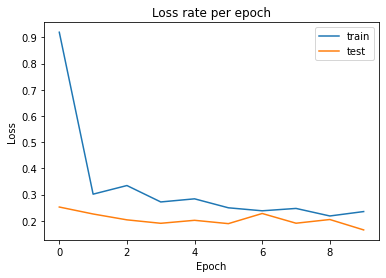

In [ ]:
def design_optimize_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(256, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_optimize_network_model()
fit_result = network_model.fit(train_data, epochs=10, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

## 7- Number of Epochs:
Training our model with just one epoch, causes underfitting since our model has not seen various data to learn the classification. As the number of epochs increases, the model learns more and accuracy metrics show improvement in testing the model. But we have to watch for overfitting, which means memorizing the data instead of learning it. The model is overfitted when it performs well on train data but not on the test data. If the number of epochs are too much, it may cause overfitting, and it takes too much time to train our network.

In this part, the number of the training epochs is changed from 10 to 20.

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_18 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_19 (Dense)             (None, 3)                 771       
Total params: 15,470,595
Trainable params

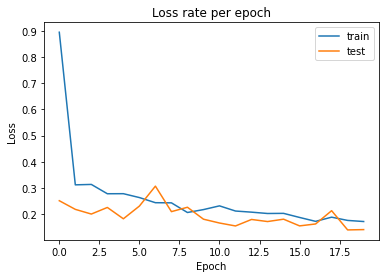

In [17]:
def design_optimize_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(256, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_optimize_network_model()
fit_result = network_model.fit(train_data, epochs=20, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

As we can see in the results, after 20 epochs the model is doing well on both train and test data, and it seems that 20 epochs is a good choice. <b>But the point is that increasing the number of epochs is not always beneficial and it may overfit the model on the train data.</b>

## 8- Loss Function:

Until now, the network was trained with "categorical cross entropy" loss function. Now it will be changed to "MSE". Let's see the results...

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 2048)              13109248  
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_6 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 771       
Total params: 15,470,595
Trainable params

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       116
           1       0.00      0.00      0.00       317
           2       0.66      1.00      0.80       855

    accuracy                           0.66      1288
   macro avg       0.22      0.33      0.27      1288
weighted avg       0.44      0.66      0.53      1288

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       460
           1       0.00      0.00      0.00      1266
           2       0.66      1.00      0.80      3418

    accuracy                           0.66      5144
   macro avg       0.22      0.33      0.27      5144
weighted avg       0.44      0.66      0.53      5144

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


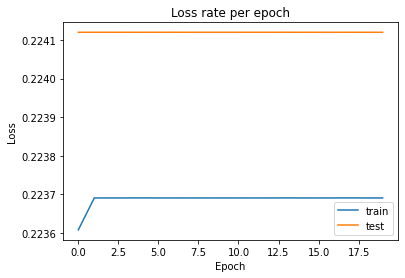

In [13]:
def design_Adam_optimizer_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, activation="relu")(out_layer)
  out_layer = layers.Dense(1024, activation="relu")(out_layer)
  out_layer = layers.Dense(256, activation="relu")(out_layer)
  out_layer = layers.Dense(3, activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="mse", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_Adam_optimizer_network_model()
fit_result = network_model.fit(train_data, epochs=20, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

As we can see, MSE is not an appropriate choice for loss function in classification problems (or binary classifications) which expect a result between 0 and 1 at the end. MSE (or Mean Squared Error) expects real-values as input to perform well due to some mathematical calculations. MSE is a non-convex loss function and this, causes problems in binary classification problems (in our case we have 3 classes which is close to binary classification), such as getting stucked in a local minima instead of finding the global minima as we are expected.

The classification report shows that our network os overflowed and the results are not acceptable.

## 9- Regularization:

I) Regularization is a method to avoid overfitting and underfitting in the network. This is achievable by generalizing the network. Designing a high capacity network reduces underfitting and methods such and "weight decay" and "early stopping" are used to avoid overfitting.
<br>
<br>
II) Designing a network with L2 regularization method(weight decay) with lambda=0.0001: Ridge regression(L2) adds “squared magnitude” of coefficient as penalty term to the loss function. if lambda is very large then it will add too much weight and it will lead to under-fitting. Having said that it’s important how lambda is chosen. This technique works very well to avoid over-fitting issue.

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 2048)              13109248  
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               262400    
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 771       
Total params: 15,470,595
Trainable params

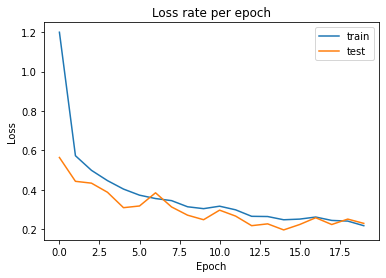

In [15]:
def design_L2_regular_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dense(2048, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(out_layer)
  out_layer = layers.Dense(1024, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(out_layer)
  out_layer = layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(out_layer)
  out_layer = layers.Dense(3, kernel_regularizer=regularizers.l2(0.0001), activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_L2_regular_network_model()
fit_result = network_model.fit(train_data, epochs=20, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)

III) Designing a network with droput method with rate=0.1 for each layer:
In this approach, the network drops the connections of 0.1 neurons in each layer. It means that with probability of 0.9, a neuron will be kept in the network at each layer. this probability is higher for the neurons that tend to be unimportant. They may be dropped out with a higher probability. (It may be a good idea to use rate = 0.5 for input layer since most of the neurons of the input may be useless)

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 80, 80, 1)]       0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6400)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 2048)              13109248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1024)              2098176   
_________________________________________

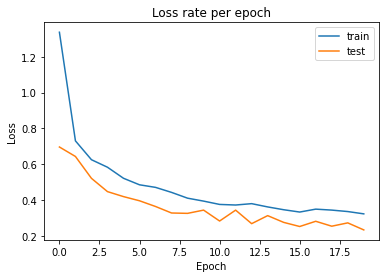

In [16]:
def design_L2_regular_network_model():
  input_layer = layers.Input(shape=(80, 80, 1))
  out_layer = layers.Flatten()(input_layer)
  out_layer = layers.Dropout(0.1)(out_layer)
  # out_layer = layers.Dropout(0.5)(out_layer)
  out_layer = layers.Dense(2048, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(out_layer)
  out_layer = layers.Dropout(0.1)(out_layer)
  out_layer = layers.Dense(1024, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(out_layer)
  out_layer = layers.Dropout(0.1)(out_layer)
  out_layer = layers.Dense(256, kernel_regularizer=regularizers.l2(0.0001), activation="relu")(out_layer)
  out_layer = layers.Dropout(0.1)(out_layer)
  out_layer = layers.Dense(3, kernel_regularizer=regularizers.l2(0.0001), activation="softmax")(out_layer)
  network_model = models.Model(inputs=input_layer, outputs=out_layer)
  network_model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=['accuracy'])
  network_model.summary()
  return network_model

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
network_model = design_L2_regular_network_model()
fit_result = network_model.fit(train_data, epochs=20, validation_data=test_data)

train_data, test_data = load_data(scale_rate=1/255., BATCH_SIZE=32)
test_labels = get_expected_labels(test_data)
train_labels = get_expected_labels(train_data)
test_predictions = network_model.predict(test_data)
train_predictions = network_model.predict(train_data)
print(classification_report(test_labels,backend.argmax(test_predictions).numpy()))
print(classification_report(train_labels,backend.argmax(train_predictions).numpy()))
draw_LPE_plot(fit_result.history)